In [248]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)
pd.describe_option('display')
import seaborn as sns
from sklearn.metrics import mean_squared_error

display.chop_threshold : float or None
    if set to a float value, all float values smaller then the given threshold
    will be displayed as exactly 0 by repr and friends.
    [default: None] [currently: None]display.colheader_justify : 'left'/'right'
    Controls the justification of column headers. used by DataFrameFormatter.
    [default: right] [currently: right]display.column_space No description available.
    [default: 12] [currently: 12]display.date_dayfirst : boolean
    When True, prints and parses dates with the day first, eg 20/01/2005
    [default: False] [currently: False]display.date_yearfirst : boolean
    When True, prints and parses dates with the year first, eg 2005/01/20
    [default: False] [currently: False]display.encoding : str/unicode
    Defaults to the detected encoding of the console.
    Specifies the encoding to be used for strings returned by to_string,
    these are generally strings meant to be displayed on the console.
    [default: UTF-8] [currently

In [186]:
data = pd.read_csv('train.csv')

In [187]:
data

,session_id,session_number,client_agent,device_details,date,purchased,added_in_cart,checked_out,time_spent
0,57f879e70d3c5fc2a98102d64c9fd84e,715,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2020-01-22,1,0,0,236.886
1,a5442b0c7c33d0a811e7661e556b2de8,55,Product/8.0 iPhone/8.1.3,iPhone - iOS,2020-02-27,1,0,0,1277.455
2,305cb1486ed8610c00b37007926cb2c4,11,Mozilla/5.0 (iPhone; CPU iPhone OS 7_1_2 like ...,iPhone - MobileWeb,2019-08-01,0,0,0,21.704
3,f2c1ecc9993f0071df91ba178450498c,2794,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Desktop - IE,2019-12-30,0,1,0,455.201
4,e460830ae295e55d2216ebdc761ab9a6,3674,Mozilla/5.0 (iPhone; CPU iPhone OS 7_1_1 like ...,iPhone - Web,2019-09-10,0,0,0,1164.877
...,...,...,...,...,...,...,...,...,...
5424,b6aa30da97fa3c95989c47ccf5ab4e9f,627,Mozilla/5.0 (iPhone; CPU iPhone OS 8_1 like Ma...,iPhone - Web,2019-11-20,0,0,0,20.601
5425,58b62e9fa867d622662b8a4096fdc3f0,6710,Product/4.2.2 iPhone/7.1.1,iPhone - iOS,2019-09-26,0,0,0,1537.666
5426,109f7f9b8384e46fc88f580b328298e8,198,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4)...,Desktop - Chrome,2019-08-13,0,0,0,22.711
5427,ac6579972e89dfc78d3ee95d15764681,913,NaN,Unknown - MobileWeb,2019-06-18,0,0,0,20.844


In [188]:
data.dtypes

session_id         object
session_number      int64
client_agent       object
device_details     object
date               object
purchased           int64
added_in_cart       int64
checked_out         int64
time_spent        float64
dtype: object

In [189]:
data['client_agent'].value_counts()

Mozilla/5.0 (iPhone; CPU iPhone OS 7_1_1 like Mac OS X) AppleWebKit/537.51.2 (KHTML, like Gecko) Mobile/11D201              209
Mozilla/5.0 (Windows NT 6.3; WOW64; Trident/7.0; Touch; rv:11.0) like Gecko                                                 163
Mozilla/5.0 (Windows NT 6.1; WOW64; Trident/7.0; rv:11.0) like Gecko                                                        148
Product/4.2.0 iPhone/7.1.1                                                                                                  146
Product/4.7.0 iPhone/8.1.2                                                                                                  144
                                                                                                                           ... 
Mozilla/5.0 (iPad; CPU OS 8_1_1 like Mac OS X) AppleWebKit/600.1.4 (KHTML, like Gecko) Mobile/12B435                          1
Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_2) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2272.

In [190]:
data['device_details'].value_counts()

iPhone - iOS                  1515
Desktop - Chrome               815
iPhone - Web                   665
Android Phone - Android        326
Desktop - Safari               313
Desktop - IE                   292
iPad - Web                     289
iPhone - MobileWeb             277
Desktop - Firefox              234
Android Tablet - Web           203
Other - Other                  185
Unknown - MobileWeb             87
Android Phone - Web             86
iPad - iOS                      77
Android Phone - MobileWeb       54
Android Tablet - Android         9
Android Tablet - MobileWeb       2
Name: device_details, dtype: int64

In [191]:
data.groupby(['device_details']).mean().sort_values(by='time_spent')

,session_number,purchased,added_in_cart,checked_out,time_spent
device_details,,,,,
Other - Other,700.075676,0.016216,0.010811,0.000000,176.338789
Unknown - MobileWeb,181.689655,0.045977,0.000000,0.000000,201.252483
iPhone - MobileWeb,1627.880866,0.010830,0.057762,0.007220,255.648924
Android Phone - Web,801.337209,0.011628,0.046512,0.000000,269.534570
Android Tablet - MobileWeb,247.500000,0.000000,0.000000,0.000000,332.864000
Android Phone - MobileWeb,619.462963,0.000000,0.333333,0.000000,365.732944
Android Tablet - Web,1677.743842,0.059113,0.339901,0.004926,444.420542
iPhone - Web,1949.960902,0.010526,0.004511,0.000000,538.567947
Desktop - Chrome,536.894479,0.263804,0.229448,0.038037,660.397282


In [192]:
data['session_id'].value_counts()

87e7c86109927e3710651cd386e03b27    1
27e6a5320bbb642bbc71de52b2f23aba    1
737a3aeba624abc7ec48c3f7ba6dadf3    1
955feda5808b693764a1122ad043bc46    1
eacb8ed0784dd0ce663b5cd29f628b50    1
                                   ..
3d6964f013a151b91f767aa9e6383389    1
80b12ae5ec334be4f0ae2340eb5ce907    1
a4a8ed67fbdd29a7bc9612d235f6cfac    1
f7f4df175913a22476f6f88ebec1ccd9    1
cd51ff781ff7054d2eb1f23b0d920f45    1
Name: session_id, Length: 5429, dtype: int64

In [193]:
data['session_number'].value_counts().to_string()

'11      437\n22      192\n33      132\n44      101\n55       93\n66       92\n77       79\n110      73\n88       70\n99       66\n143      61\n132      61\n121      60\n176      60\n154      56\n198      55\n165      52\n187      51\n231      50\n209      50\n220      49\n242      48\n253      44\n297      39\n319      36\n286      36\n264      35\n275      34\n440      32\n330      31\n374      31\n341      31\n385      31\n418      30\n396      29\n363      29\n407      28\n528      28\n352      27\n495      27\n638      27\n308      26\n429      26\n715      25\n473      25\n517      25\n451      25\n649      25\n550      25\n770      25\n506      24\n539      24\n792      24\n462      24\n671      23\n572      23\n605      23\n583      23\n682      23\n803      23\n737      22\n781      22\n594      22\n484      22\n726      21\n561      21\n880      21\n836      21\n869      21\n913      21\n759      20\n814      20\n1001     20\n858      20\n847      20\n616      20\n935      20

In [194]:
data[data['session_number']==3487]

,session_id,session_number,client_agent,device_details,date,purchased,added_in_cart,checked_out,time_spent
154,8b140f7b5b31c17bd228f5354a605d17,3487,Product/4.7.0 iPhone/8.1,iPhone - iOS,2019-12-27,0,0,0,63.865
2251,c1ee37819e52553323005d66bec6af6e,3487,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Desktop - IE,2020-02-11,0,1,0,334.705
3265,2ddd824e830e2f27d5910897b0e1b174,3487,Product/4.2.0 iPhone/7.1.1,iPhone - iOS,2019-09-09,0,0,0,7768.607
4231,8b6c8b5fc48fbabbcf49f1a3e5fb5cca,3487,Mozilla/5.0 (iPhone; CPU iPhone OS 8_1_2 like ...,iPhone - Web,2019-12-26,0,0,0,22.053


In [195]:
data.describe()

,session_number,purchased,added_in_cart,checked_out,time_spent
count,5429.000000,5429.000000,5429.000000,5429.000000,5429.000000
mean,1072.835329,0.159145,0.162092,0.017499,663.194292
std,1436.351474,0.365845,0.368570,0.131132,1713.671664
min,11.000000,0.000000,0.000000,0.000000,14.400000
25%,121.000000,0.000000,0.000000,0.000000,22.699000
50%,517.000000,0.000000,0.000000,0.000000,98.312000
75%,1397.000000,0.000000,0.000000,0.000000,600.463000
max,7722.000000,1.000000,1.000000,1.000000,38494.025000


In [196]:
data.isnull().sum()

session_id          0
session_number      0
client_agent      160
device_details      0
date                0
purchased           0
added_in_cart       0
checked_out         0
time_spent          0
dtype: int64

In [197]:

data['date']=pd.to_datetime(data['date'])


In [198]:
data.head(2)

,session_id,session_number,client_agent,device_details,date,purchased,added_in_cart,checked_out,time_spent
0,57f879e70d3c5fc2a98102d64c9fd84e,715,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2020-01-22,1,0,0,236.886
1,a5442b0c7c33d0a811e7661e556b2de8,55,Product/8.0 iPhone/8.1.3,iPhone - iOS,2020-02-27,1,0,0,1277.455


In [199]:
data.dtypes

session_id                object
session_number             int64
client_agent              object
device_details            object
date              datetime64[ns]
purchased                  int64
added_in_cart              int64
checked_out                int64
time_spent               float64
dtype: object

In [200]:
#Adding new feature, day of week into data frame
data['day_of_week']=data['date'].dt.day_name()

In [201]:
data.head()

,session_id,session_number,client_agent,device_details,date,purchased,added_in_cart,checked_out,time_spent,day_of_week
0,57f879e70d3c5fc2a98102d64c9fd84e,715,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2020-01-22,1,0,0,236.886,Wednesday
1,a5442b0c7c33d0a811e7661e556b2de8,55,Product/8.0 iPhone/8.1.3,iPhone - iOS,2020-02-27,1,0,0,1277.455,Thursday
2,305cb1486ed8610c00b37007926cb2c4,11,Mozilla/5.0 (iPhone; CPU iPhone OS 7_1_2 like ...,iPhone - MobileWeb,2019-08-01,0,0,0,21.704,Thursday
3,f2c1ecc9993f0071df91ba178450498c,2794,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Desktop - IE,2019-12-30,0,1,0,455.201,Monday
4,e460830ae295e55d2216ebdc761ab9a6,3674,Mozilla/5.0 (iPhone; CPU iPhone OS 7_1_1 like ...,iPhone - Web,2019-09-10,0,0,0,1164.877,Tuesday


In [202]:
data.groupby(['day_of_week']).mean().sort_values(by='time_spent')

,session_number,purchased,added_in_cart,checked_out,time_spent
day_of_week,,,,,
Wednesday,1099.571429,0.154545,0.175325,0.018182,620.342142
Thursday,1122.474930,0.161560,0.168524,0.022284,629.013922
Sunday,1047.242117,0.162162,0.137387,0.021396,648.261422
Saturday,1070.745763,0.160247,0.138675,0.013867,663.812399
Tuesday,1013.549654,0.166282,0.183603,0.020785,666.435814
Monday,1054.975553,0.152503,0.165308,0.013970,677.894517
Friday,1123.701031,0.156112,0.163476,0.010309,744.140161


In [203]:
data['purchased'].unique(), data['added_in_cart'].unique(), data['checked_out'].unique()

(array([1, 0], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64))

In [204]:
data['purchased'].value_counts(), data['added_in_cart'].value_counts(), data['checked_out'].value_counts()

(0    4565
 1     864
 Name: purchased, dtype: int64,
 0    4549
 1     880
 Name: added_in_cart, dtype: int64,
 0    5334
 1      95
 Name: checked_out, dtype: int64)

In [205]:
data.head(2)

,session_id,session_number,client_agent,device_details,date,purchased,added_in_cart,checked_out,time_spent,day_of_week
0,57f879e70d3c5fc2a98102d64c9fd84e,715,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2020-01-22,1,0,0,236.886,Wednesday
1,a5442b0c7c33d0a811e7661e556b2de8,55,Product/8.0 iPhone/8.1.3,iPhone - iOS,2020-02-27,1,0,0,1277.455,Thursday


In [206]:
cleaned_data = data.drop(['session_id','session_number','client_agent','date'], axis=1)

In [207]:
cleaned_data

,device_details,purchased,added_in_cart,checked_out,time_spent,day_of_week
0,Desktop - Chrome,1,0,0,236.886,Wednesday
1,iPhone - iOS,1,0,0,1277.455,Thursday
2,iPhone - MobileWeb,0,0,0,21.704,Thursday
3,Desktop - IE,0,1,0,455.201,Monday
4,iPhone - Web,0,0,0,1164.877,Tuesday
...,...,...,...,...,...,...
5424,iPhone - Web,0,0,0,20.601,Wednesday
5425,iPhone - iOS,0,0,0,1537.666,Thursday
5426,Desktop - Chrome,0,0,0,22.711,Tuesday
5427,Unknown - MobileWeb,0,0,0,20.844,Tuesday


In [208]:
cleaned_data['day_of_week'] = cleaned_data['day_of_week'].map({'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7})

In [209]:
cleaned_data

,device_details,purchased,added_in_cart,checked_out,time_spent,day_of_week
0,Desktop - Chrome,1,0,0,236.886,3
1,iPhone - iOS,1,0,0,1277.455,4
2,iPhone - MobileWeb,0,0,0,21.704,4
3,Desktop - IE,0,1,0,455.201,1
4,iPhone - Web,0,0,0,1164.877,2
...,...,...,...,...,...,...
5424,iPhone - Web,0,0,0,20.601,3
5425,iPhone - iOS,0,0,0,1537.666,4
5426,Desktop - Chrome,0,0,0,22.711,2
5427,Unknown - MobileWeb,0,0,0,20.844,2


In [210]:
device_details_dict = cleaned_data.groupby(['device_details'])['time_spent'].mean().to_dict()

In [211]:
device_details_dict

{'Android Phone - Android': 883.0499018404907,
 'Android Phone - MobileWeb': 365.73294444444446,
 'Android Phone - Web': 269.53456976744184,
 'Android Tablet - Android': 821.0520000000001,
 'Android Tablet - MobileWeb': 332.864,
 'Android Tablet - Web': 444.4205418719211,
 'Desktop - Chrome': 660.397282208589,
 'Desktop - Firefox': 1091.3580811965815,
 'Desktop - IE': 716.5246061643836,
 'Desktop - Safari': 855.8169297124601,
 'Other - Other': 176.33878918918919,
 'Unknown - MobileWeb': 201.25248275862066,
 'iPad - Web': 711.2398304498269,
 'iPad - iOS': 945.2887272727276,
 'iPhone - MobileWeb': 255.6489241877256,
 'iPhone - Web': 538.5679473684215,
 'iPhone - iOS': 754.6391689768958}

In [212]:
cleaned_data['device_details'] = cleaned_data['device_details'].map(device_details_dict)

In [213]:
cleaned_data

,device_details,purchased,added_in_cart,checked_out,time_spent,day_of_week
0,660.397282,1,0,0,236.886,3
1,754.639169,1,0,0,1277.455,4
2,255.648924,0,0,0,21.704,4
3,716.524606,0,1,0,455.201,1
4,538.567947,0,0,0,1164.877,2
...,...,...,...,...,...,...
5424,538.567947,0,0,0,20.601,3
5425,754.639169,0,0,0,1537.666,4
5426,660.397282,0,0,0,22.711,2
5427,201.252483,0,0,0,20.844,2


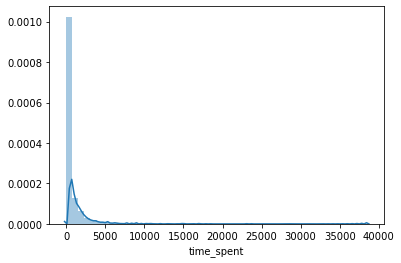

In [214]:
sns.distplot(cleaned_data['time_spent'])

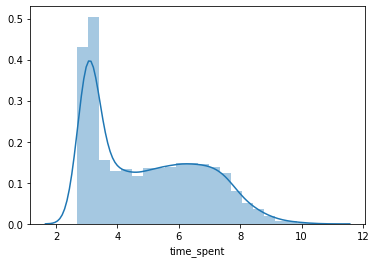

In [215]:
sns.distplot(np.log(cleaned_data['time_spent']))

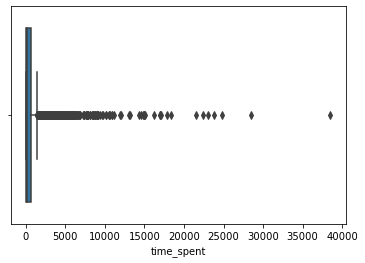

In [216]:
sns.boxplot(cleaned_data['time_spent'])

In [217]:
q = cleaned_data['time_spent'].quantile(0.90)
q

1739.2698

In [218]:
cleaned_data[cleaned_data['time_spent']<q].shape

(4886, 6)

In [219]:
cleaned_data = cleaned_data[cleaned_data['time_spent']<q]

In [220]:
cleaned_data

,device_details,purchased,added_in_cart,checked_out,time_spent,day_of_week
0,660.397282,1,0,0,236.886,3
1,754.639169,1,0,0,1277.455,4
2,255.648924,0,0,0,21.704,4
3,716.524606,0,1,0,455.201,1
4,538.567947,0,0,0,1164.877,2
...,...,...,...,...,...,...
5424,538.567947,0,0,0,20.601,3
5425,754.639169,0,0,0,1537.666,4
5426,660.397282,0,0,0,22.711,2
5427,201.252483,0,0,0,20.844,2


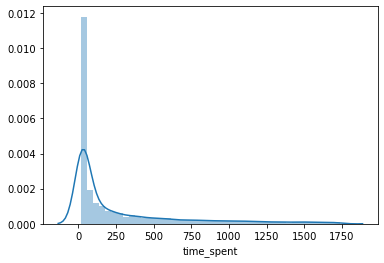

In [221]:
sns.distplot(cleaned_data['time_spent'])

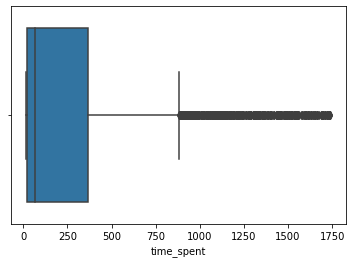

In [222]:
sns.boxplot(cleaned_data['time_spent'])

In [225]:
#Taking log for time as the histogram is bent towards right
cleaned_data['time_spent'] = np.log(cleaned_data['time_spent'])

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [226]:
cleaned_data

,device_details,purchased,added_in_cart,checked_out,time_spent,day_of_week
0,660.397282,1,0,0,5.467579,3
1,754.639169,1,0,0,7.152625,4
2,255.648924,0,0,0,3.077497,4
3,716.524606,0,1,0,6.120739,1
4,538.567947,0,0,0,7.060371,2
...,...,...,...,...,...,...
5424,538.567947,0,0,0,3.025340,3
5425,754.639169,0,0,0,7.338021,4
5426,660.397282,0,0,0,3.122849,2
5427,201.252483,0,0,0,3.037066,2


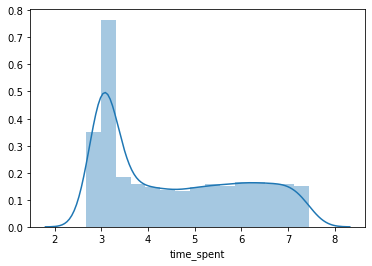

In [230]:
sns.distplot(cleaned_data['time_spent'])

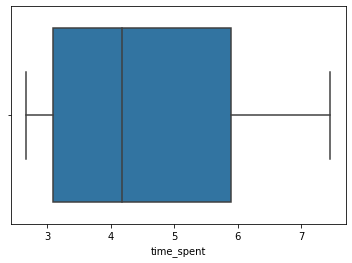

In [228]:
sns.boxplot(cleaned_data['time_spent'])

In [231]:
cleaned_data

,device_details,purchased,added_in_cart,checked_out,time_spent,day_of_week
0,660.397282,1,0,0,5.467579,3
1,754.639169,1,0,0,7.152625,4
2,255.648924,0,0,0,3.077497,4
3,716.524606,0,1,0,6.120739,1
4,538.567947,0,0,0,7.060371,2
...,...,...,...,...,...,...
5424,538.567947,0,0,0,3.025340,3
5425,754.639169,0,0,0,7.338021,4
5426,660.397282,0,0,0,3.122849,2
5427,201.252483,0,0,0,3.037066,2


In [233]:
X = cleaned_data.drop(['time_spent'],axis=1)
y = cleaned_data['time_spent']

In [241]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X,y,test_size=0.2,random_state=100)

In [267]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state=100)
rfr.fit(train_x,train_y)
predicted=rfr.predict(test_x)
mean_squared_error(test_y,predicted)


1.4536422538088534

In [269]:
from sklearn.ensemble import GradientBoostingRegressor
rfr = GradientBoostingRegressor(random_state=100)
rfr.fit(train_x,train_y)
predicted=rfr.predict(test_x)
mean_squared_error(test_y,predicted)

1.3981692979606797

In [271]:
from sklearn.ensemble import AdaBoostRegressor
rfr = AdaBoostRegressor(random_state=100)
rfr.fit(train_x,train_y)
predicted=rfr.predict(test_x)
mean_squared_error(test_y,predicted)

1.4872510565066206

In [275]:
import xgboost as xgb
from xgboost import XGBRegressor
rfr = XGBRegressor(objective = 'reg:squaredlogerror',random_state=100)
rfr.fit(train_x,train_y)
predicted=rfr.predict(test_x)
mean_squared_error(test_y,predicted)

1.432180836297861

In [291]:
from sklearn.neighbors import KNeighborsRegressor
rfr = KNeighborsRegressor(n_neighbors=18)
rfr.fit(train_x,train_y)
predicted=rfr.predict(test_x)
mean_squared_error(test_y,predicted)

1.5781910496407214

In [295]:
from sklearn.svm import SVR
rfr = SVR()
rfr.fit(train_x,train_y)
predicted=rfr.predict(test_x)
mean_squared_error(test_y,predicted)

2.155883194121867

In [296]:
from sklearn.linear_model import LinearRegression
rfr = LinearRegression()
rfr.fit(train_x,train_y)
predicted=rfr.predict(test_x)
mean_squared_error(test_y,predicted)

1.4848121807474652

In [302]:
from sklearn.tree import DecisionTreeRegressor
rfr = DecisionTreeRegressor()
rfr.fit(train_x,train_y)
predicted=rfr.predict(test_x)
mean_squared_error(test_y,predicted)

1.4625455137242576

In [306]:
#Gradient boosting regressor works well
estimator = GradientBoostingRegressor(random_state=100)
estimator

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=100, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [305]:
grid_param = {
    'criterion':['friedman_mse','mse','mae'],
    'learning_rate':[0.1,0.01,0.001],
    'loss':['ls','lad','huber'],
    'n_estimators':[100,150,200],
    'max_depth':[2,3,4]
}

In [309]:
# from sklearn.model_selection import GridSearchCV
# grid_search = GridSearchCV(estimator=estimator, param_grid= grid_param, cv=5, n_jobs=-1)

In [310]:
# grid_search.fit(train_x,train_y)

GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_n...
                            

In [311]:
grid_search.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 2,
 'n_estimators': 100}

In [313]:
rfr = GradientBoostingRegressor(max_depth=2, random_state=100)
rfr.fit(train_x,train_y)
predicted=rfr.predict(test_x)
mean_squared_error(test_y,predicted)

1.3981061627770912

In [317]:
final_model = GradientBoostingRegressor(max_depth=3, random_state=100)
final_model.fit(X,y)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=100, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [332]:
test = pd.read_csv('test.csv')

In [333]:
test

,session_id,session_number,client_agent,device_details,date,purchased,added_in_cart,checked_out
0,0bf72b05b2cf70dc5e28c3c09f9c4f97,99,Mozilla/5.0 (Windows NT 6.1; WOW64; Trident/7....,Desktop - IE,2020-01-07,1,0,0
1,6bc696d99954e4f1367e845465186aef,935,Product/160393 Android/4.3 Device/samsung_GT-I...,Android Phone - Android,2020-02-13,0,0,0
2,3d8611a5ea0f621d205b67f09f663a89,902,Product/4.2.2 iPhone/7.1.2,iPhone - iOS,2019-10-14,1,0,0
3,a0351545c032fd0da36289410c6c3354,3223,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Desktop - IE,2020-01-26,0,0,0
4,dd8999772b0ab27225fb05e5df2f1da6,231,Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKi...,Desktop - Chrome,2020-01-29,0,0,0
...,...,...,...,...,...,...,...,...
2322,a7ce384215acf0a0efe8e6152d6e0af3,1375,Product/244 CFNetwork/711.1.12 Darwin/14.0.0,Other - Other,2019-11-06,0,0,0
2323,627898fc1c329846956412487ca617b3,1617,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2020-01-18,0,1,0
2324,f642380795f4b57ffac8b5c4d6556765,4433,Product/4.7.0 iPhone/8.1.2,iPhone - iOS,2020-01-14,0,0,0
2325,298c00625e7ffef797745a866b898d3c,297,Product/4.2.2 iPad/8.0,iPad - iOS,2019-10-01,1,0,0


In [334]:
test_cleaned = test.drop(['session_id','session_number','client_agent'], axis=1)

In [335]:
test_cleaned

,device_details,date,purchased,added_in_cart,checked_out
0,Desktop - IE,2020-01-07,1,0,0
1,Android Phone - Android,2020-02-13,0,0,0
2,iPhone - iOS,2019-10-14,1,0,0
3,Desktop - IE,2020-01-26,0,0,0
4,Desktop - Chrome,2020-01-29,0,0,0
...,...,...,...,...,...
2322,Other - Other,2019-11-06,0,0,0
2323,Desktop - Chrome,2020-01-18,0,1,0
2324,iPhone - iOS,2020-01-14,0,0,0
2325,iPad - iOS,2019-10-01,1,0,0


In [336]:
test_cleaned['date']=pd.to_datetime(test_cleaned['date'])
test_cleaned['day_of_week']=test_cleaned['date'].dt.day_name()
test_cleaned['day_of_week'] = test_cleaned['day_of_week'].map({'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7})
test_cleaned

,device_details,date,purchased,added_in_cart,checked_out,day_of_week
0,Desktop - IE,2020-01-07,1,0,0,2
1,Android Phone - Android,2020-02-13,0,0,0,4
2,iPhone - iOS,2019-10-14,1,0,0,1
3,Desktop - IE,2020-01-26,0,0,0,7
4,Desktop - Chrome,2020-01-29,0,0,0,3
...,...,...,...,...,...,...
2322,Other - Other,2019-11-06,0,0,0,3
2323,Desktop - Chrome,2020-01-18,0,1,0,6
2324,iPhone - iOS,2020-01-14,0,0,0,2
2325,iPad - iOS,2019-10-01,1,0,0,2


In [337]:
test_cleaned['device_details'] = test_cleaned['device_details'].map(device_details_dict)
test_cleaned

,device_details,date,purchased,added_in_cart,checked_out,day_of_week
0,716.524606,2020-01-07,1,0,0,2
1,883.049902,2020-02-13,0,0,0,4
2,754.639169,2019-10-14,1,0,0,1
3,716.524606,2020-01-26,0,0,0,7
4,660.397282,2020-01-29,0,0,0,3
...,...,...,...,...,...,...
2322,176.338789,2019-11-06,0,0,0,3
2323,660.397282,2020-01-18,0,1,0,6
2324,754.639169,2020-01-14,0,0,0,2
2325,945.288727,2019-10-01,1,0,0,2


In [338]:
device_details_dict

{'Android Phone - Android': 883.0499018404907,
 'Android Phone - MobileWeb': 365.73294444444446,
 'Android Phone - Web': 269.53456976744184,
 'Android Tablet - Android': 821.0520000000001,
 'Android Tablet - MobileWeb': 332.864,
 'Android Tablet - Web': 444.4205418719211,
 'Desktop - Chrome': 660.397282208589,
 'Desktop - Firefox': 1091.3580811965815,
 'Desktop - IE': 716.5246061643836,
 'Desktop - Safari': 855.8169297124601,
 'Other - Other': 176.33878918918919,
 'Unknown - MobileWeb': 201.25248275862066,
 'iPad - Web': 711.2398304498269,
 'iPad - iOS': 945.2887272727276,
 'iPhone - MobileWeb': 255.6489241877256,
 'iPhone - Web': 538.5679473684215,
 'iPhone - iOS': 754.6391689768958}

In [339]:
test_cleaned

,device_details,date,purchased,added_in_cart,checked_out,day_of_week
0,716.524606,2020-01-07,1,0,0,2
1,883.049902,2020-02-13,0,0,0,4
2,754.639169,2019-10-14,1,0,0,1
3,716.524606,2020-01-26,0,0,0,7
4,660.397282,2020-01-29,0,0,0,3
...,...,...,...,...,...,...
2322,176.338789,2019-11-06,0,0,0,3
2323,660.397282,2020-01-18,0,1,0,6
2324,754.639169,2020-01-14,0,0,0,2
2325,945.288727,2019-10-01,1,0,0,2


In [340]:
test_cleaned = test_cleaned.drop(['date'],axis=1)

In [341]:
test_cleaned

,device_details,purchased,added_in_cart,checked_out,day_of_week
0,716.524606,1,0,0,2
1,883.049902,0,0,0,4
2,754.639169,1,0,0,1
3,716.524606,0,0,0,7
4,660.397282,0,0,0,3
...,...,...,...,...,...
2322,176.338789,0,0,0,3
2323,660.397282,0,1,0,6
2324,754.639169,0,0,0,2
2325,945.288727,1,0,0,2


In [343]:
X

,device_details,purchased,added_in_cart,checked_out,day_of_week
0,660.397282,1,0,0,3
1,754.639169,1,0,0,4
2,255.648924,0,0,0,4
3,716.524606,0,1,0,1
4,538.567947,0,0,0,2
...,...,...,...,...,...
5424,538.567947,0,0,0,3
5425,754.639169,0,0,0,4
5426,660.397282,0,0,0,2
5427,201.252483,0,0,0,2


In [354]:
final_pred = final_model.predict(test_cleaned)
final_pred

array([5.78236118, 4.3121181 , 5.69008274, ..., 4.37850758, 6.06493424,
       6.0854013 ])

In [355]:
predicted_values = np.exp(final_pred)
predicted_values

array([324.52454711,  74.59832818, 295.91810352, ...,  79.71897038,
       430.49436773, 439.39610814])

In [358]:
submit = pd.DataFrame(predicted_values, columns=['time_spent'])

In [361]:
submit.to_csv('Sample Submission.csv',index=False)